In [1]:
import sys
from pathlib import Path
import numpy as np
sys.path.append(str(Path().resolve().parents[0] / "src"))
sys.path.append(str(Path().resolve().parents[0] / "scripts"))

from src.fermat_weber.newton import newton_armijo
from scripts.plot_utils import plot_f_and_points



x* = [0.21132487 0.21132487]   f(x*) = 1.9318516525781366   iters = 4


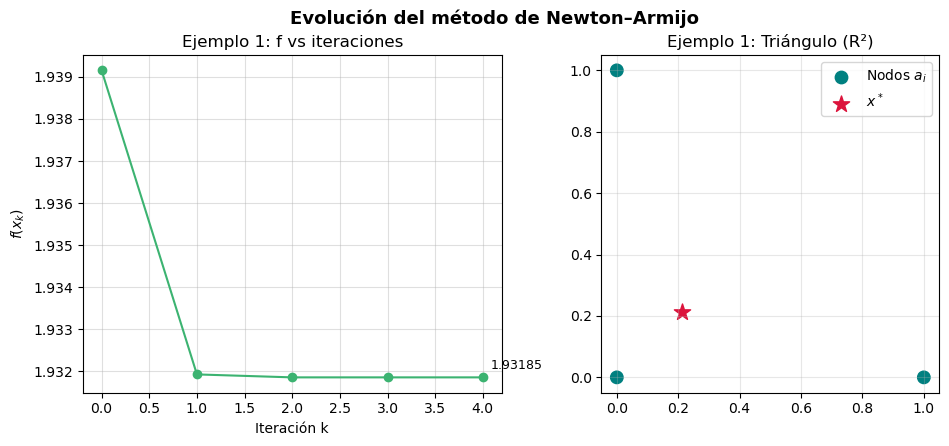

In [2]:
A = np.array([[0.0, 0.0],
              [1.0, 0.0],
              [0.0, 1.0]], dtype=float)
w = np.ones(3, dtype=float)

res = newton_armijo(A, w)
print("x* =", res["x"], "  f(x*) =", res["f"], "  iters =", res["k"])

_ = plot_f_and_points(
    res["hist"], A, w, res["x"],
    title_f="Ejemplo 1: f vs iteraciones",
    title_points="Ejemplo 1: Triángulo (R²)",
    layout="1x2"
)

x* = 1.0   f(x*) = 3.0   iters = 0


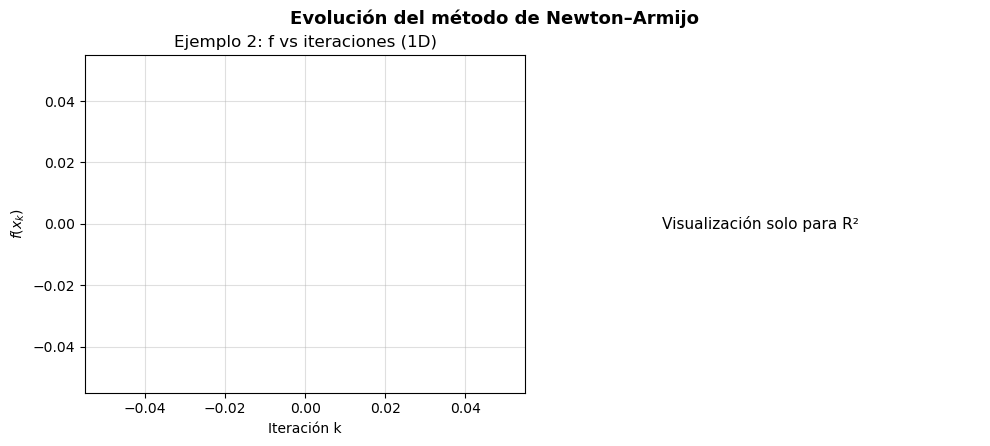

In [3]:
A = np.array([[0.0],
              [1.0],
              [3.0]], dtype=float)

w = np.array([1.0, 2.0, 1.0], dtype=float)

res = newton_armijo(A, w)
print("x* =", float(res["x"].ravel()[0]), "  f(x*) =", res["f"], "  iters =", res["k"])

_ = plot_f_and_points(
    res["hist"], A, w, res["x"],
    title_f="Ejemplo 2: f vs iteraciones (1D)",
    title_points="(No aplica visualización en R²)",
    layout="1x2"
)

x* = [0. 0.]   f(x*) = 2.0   iters = 0


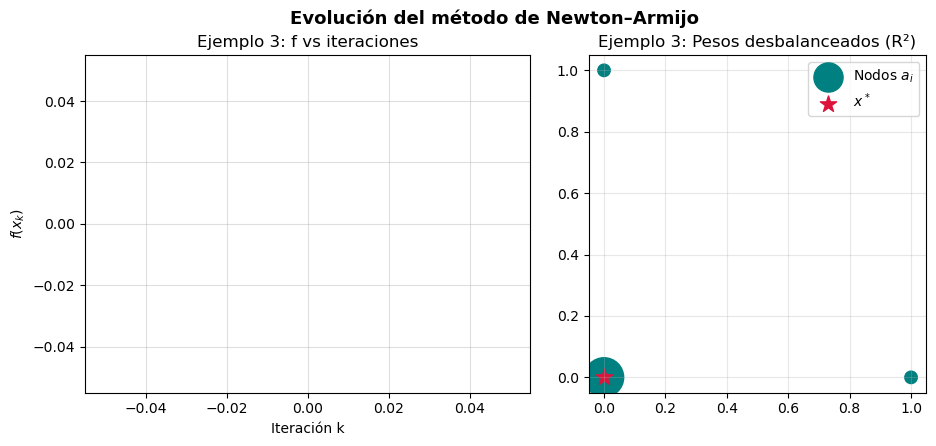

In [4]:
A = np.array([[0.0, 0.0],
              [1.0, 0.0],
              [0.0, 1.0]], dtype=float)
w = np.array([10.0, 1.0, 1.0], dtype=float)

res = newton_armijo(A, w)
print("x* =", res["x"], "  f(x*) =", res["f"], "  iters =", res["k"])

_ = plot_f_and_points(
    res["hist"], A, w, res["x"],
    title_f="Ejemplo 3: f vs iteraciones",
    title_points="Ejemplo 3: Pesos desbalanceados (R²)",
    layout="1x2"
)

x* = [0.32883408 0.22287635]   f(x*) = 73.86970153722707   iters = 5


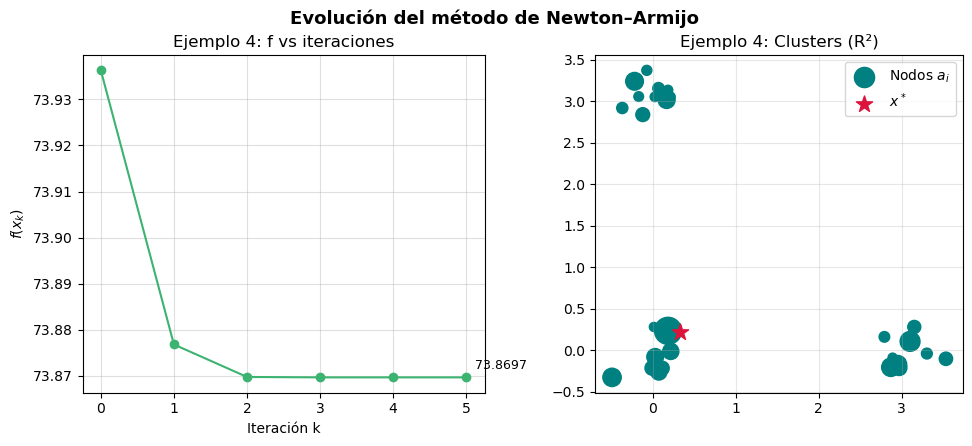

In [5]:
rng = np.random.default_rng(42)
C = np.array([[0.0, 0.0], [3.0, 0.0], [0.0, 3.0]])
A = np.vstack([c + 0.25 * rng.standard_normal((10, 2)) for c in C])
w = 0.5 + rng.exponential(0.8, size=A.shape[0])

res = newton_armijo(A, w, max_iter=300)
print("x* =", res["x"], "  f(x*) =", res["f"], "  iters =", res["k"])

_ = plot_f_and_points(
    res["hist"], A, w, res["x"],
    title_f="Ejemplo 4: f vs iteraciones",
    title_points="Ejemplo 4: Clusters (R²)",
    layout="1x2"
)

x* = [0.43181288 0.60487962]   f(x*) = 7.64760858989461   iters = 5


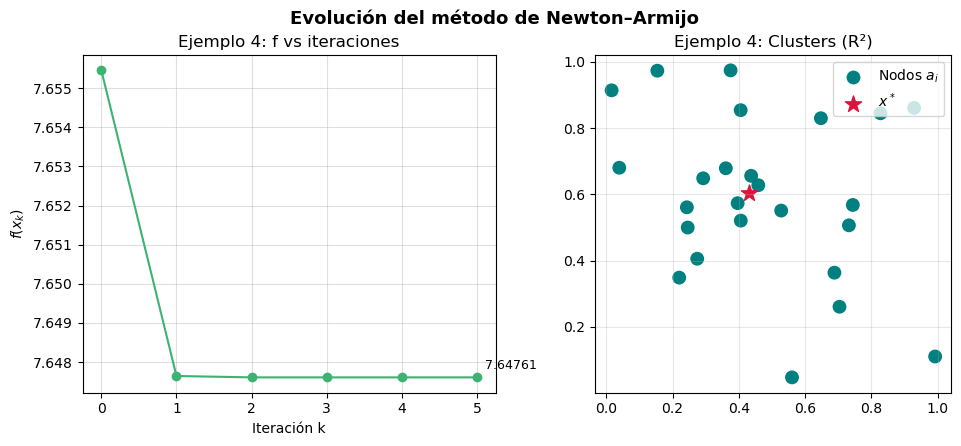

In [6]:
n = 25
A = np.random.rand(n,2)
w = np.ones(n,dtype=float)

res = newton_armijo(A, w, max_iter=300)
print("x* =", res["x"], "  f(x*) =", res["f"], "  iters =", res["k"])

_ = plot_f_and_points(
    res["hist"], A, w, res["x"],
    title_f="Ejemplo 4: f vs iteraciones",
    title_points="Ejemplo 4: Clusters (R²)",
    layout="1x2")

x* = [-2.76098515e-16  2.41717475e-16]


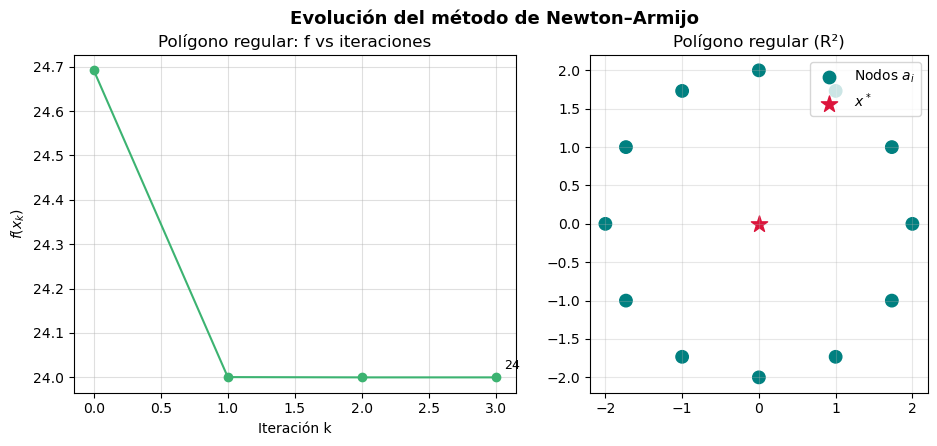

In [7]:
# Celda A: Poligono regular pesos iguales → x* = (0,0)

def regular_ngon(n=12, R=2.0, center=(0.0, 0.0)):
    theta = np.linspace(0, 2*np.pi, n, endpoint=False)
    A = np.c_[center[0] + R*np.cos(theta), center[1] + R*np.sin(theta)]
    w = np.ones(n)
    return A, w

A, w = regular_ngon(n=12, R=2.0, center=(0.0, 0.0))
res = newton_armijo(A, w)

print("x* =", res["x"])
_ = plot_f_and_points(res["hist"], A, w, res["x"],
                      title_f="Polígono regular: f vs iteraciones",
                      title_points="Polígono regular (R²)",
                      layout="1x2")


x* = [-0.03962803  0.10315106]   (debería ser ~ [0,0])


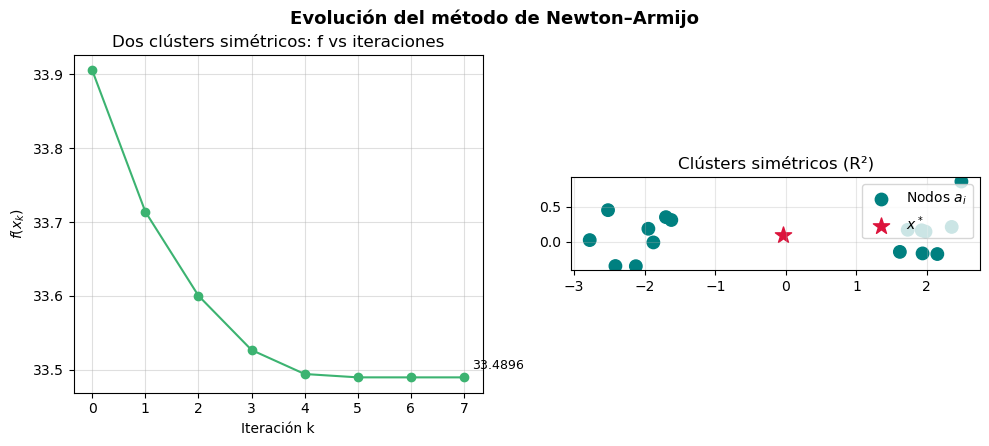

In [8]:
rng = np.random.default_rng(42)
n_per = 8
d = 2

left  = np.c_[-d + 0.4*rng.standard_normal(n_per), 0.4*rng.standard_normal(n_per)]
right = np.c_[ d + 0.4*rng.standard_normal(n_per), 0.4*rng.standard_normal(n_per)]
A = np.vstack([left, right])
w = np.ones(A.shape[0])  # igual total en ambos lados

res = newton_armijo(A, w, max_iter=300)
print("x* =", res["x"], "  (debería ser ~ [0,0])")

_ = plot_f_and_points(res["hist"], A, w, res["x"],
                      title_f="Dos clústers simétricos: f vs iteraciones",
                      title_points="Clústers simétricos (R²)",
                      layout="1x2")

x* = [7.28312809e-17 5.71289842e-17]   (debería ser ~ [0,0])


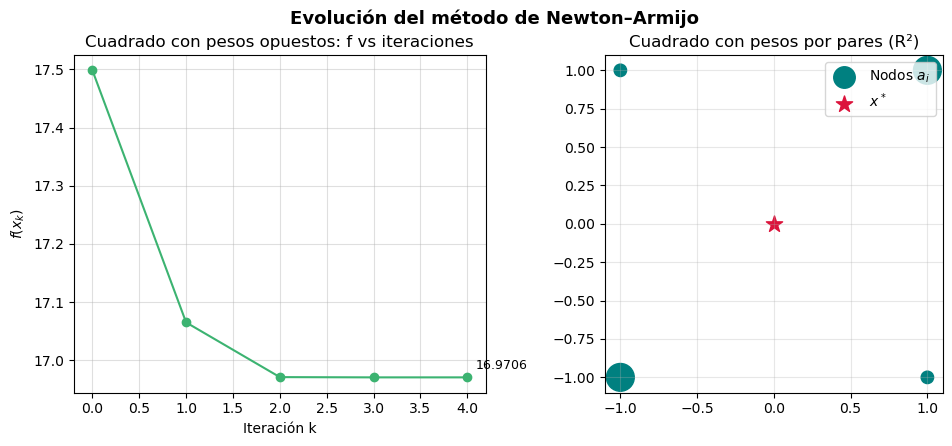

In [9]:
# Cuadrado con pesos por pares opuestos → x* = centro
A = np.array([[-1.0, -1.0],
              [ 1.0, -1.0],
              [ 1.0,  1.0],
              [-1.0,  1.0]], dtype=float)

# Pares opuestos con el mismo peso (w0==w2, w1==w3)
w = np.array([5.0, 1.0, 5.0, 1.0], dtype=float)

res = newton_armijo(A, w)
print("x* =", res["x"], "  (debería ser ~ [0,0])")

_ = plot_f_and_points(res["hist"], A, w, res["x"],
                      title_f="Cuadrado con pesos opuestos: f vs iteraciones",
                      title_points="Cuadrado con pesos por pares (R²)",
                      layout="1x2")
